In [1]:
import sys
sys.executable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the epf toolbox data package and read in 6 years of historical data from the NordPool database
# Returns a pandas dataframe for training and testing datasets
# Store in the /data directory
# Set the test dataset to the last 2 years of the dataset

from epftoolbox.data import read_data
df_train, df_test = read_data(path='NordPool_data/', dataset='NP', years_test=2)

In [3]:
# Use a helper function to ensure no NaN values in the df
import helper_functions as helper

df_train = helper.fill_nan_with_mean(df_train)
df_test = helper.fill_nan_with_mean(df_test)

# Inspect the datasets to ensure the training set and test set are the correct years
df_train.head()



,Price,Exogenous 1,Exogenous 2
Date,,,
2016-12-27 00:00:00,24.08,42653.0,2124.0
2016-12-27 01:00:00,22.52,41868.0,1905.0
2016-12-27 02:00:00,20.13,41534.0,2053.0
2016-12-27 03:00:00,19.86,41642.0,2274.0
2016-12-27 04:00:00,20.09,42418.0,2549.0


In [4]:
df_train.tail()

,Price,Exogenous 1,Exogenous 2
Date,,,
2016-12-26 19:00:00,27.44,46686.0,3395.0
2016-12-26 20:00:00,27.11,45935.0,2889.0
2016-12-26 21:00:00,26.82,45471.0,2129.0
2016-12-26 22:00:00,26.65,44386.0,1827.0
2016-12-26 23:00:00,25.68,43017.0,1689.0


In [5]:
df_test.head()

,Price,Exogenous 1,Exogenous 2
Date,,,
2016-12-27 00:00:00,24.08,42653.0,2124.0
2016-12-27 01:00:00,22.52,41868.0,1905.0
2016-12-27 02:00:00,20.13,41534.0,2053.0
2016-12-27 03:00:00,19.86,41642.0,2274.0
2016-12-27 04:00:00,20.09,42418.0,2549.0


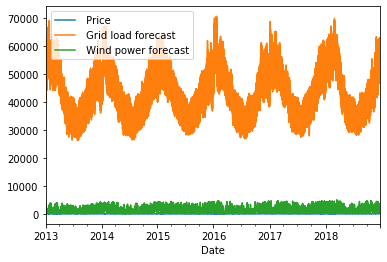

In [9]:
# Data Visulalisation
from pandas import read_csv
pre_normalisation = read_csv('NordPool_data/NP.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
pre_normalisation.plot(figsize=)
plt.show()

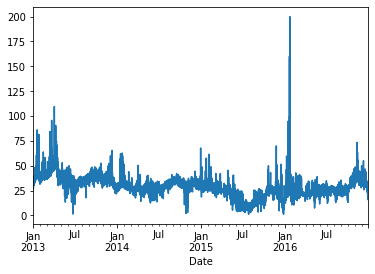

In [10]:
# Can see from the plot that the price is too small to be seen 
# on the same scale as the grid load and the wind power forecast.
# Scaling factor is needed
# Not sure which scaling method is best, will visualise to see
df_train.Price.plot()

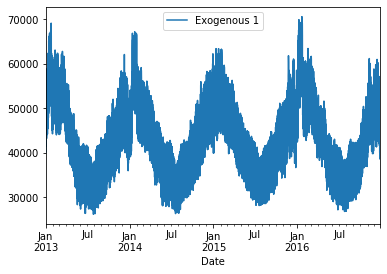

In [14]:
df_train.plot(y='Exogenous 1')

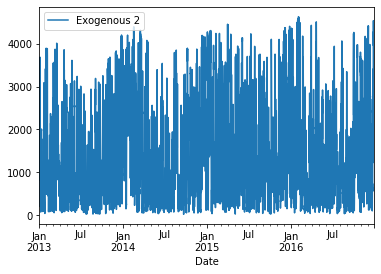

In [15]:
df_train.plot(y='Exogenous 2')

<function matplotlib.pyplot.show(*args, **kw)>

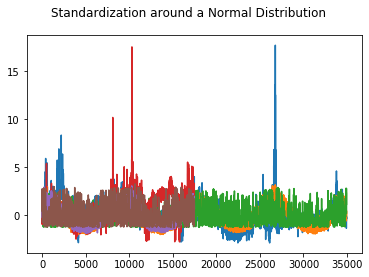

In [21]:
from epftoolbox.data import DataScaler

# Convert the data to a numpy array
X_train = df_train.values
X_test = df_test.values

# Create an Standard Distribution scaler 
scaler_std = DataScaler('Std')
X_train_scaled_std = scaler.fit_transform(X_train)
X_test_scaled_std = scaler.transform(X_test)
plt.figure()
plt.plot(X_train_scaled_std)
plt.plot(X_test_scaled_std)
plt.suptitle('Standardization around a Normal Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

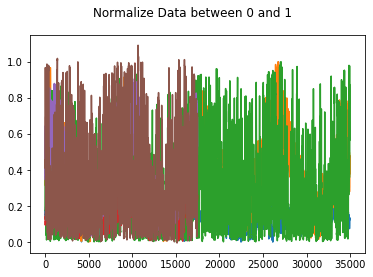

In [25]:
# Create scaler to normalise the data between 0 and 1
scaler_norm = DataScaler('Norm')
X_train_scaled_norm = scaler_norm.fit_transform(X_train)
X_test_scaled_norm = scaler_norm.transform(X_test)
plt.figure()
plt.plot(X_train_scaled_norm)
plt.plot(X_test_scaled_norm)
plt.suptitle('Normalize Data between 0 and 1')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

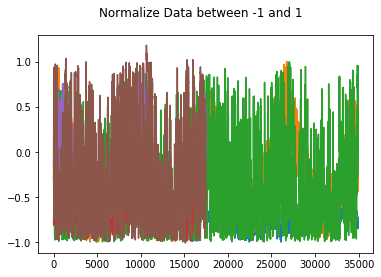

In [24]:
# Create scaler to normalise the data between -1 and 1
scaler_norm1 = DataScaler('Norm1')
X_train_scaled_norm1 = scaler_norm1.fit_transform(X_train)
X_test_scaled_norm1 = scaler_norm1.transform(X_test)
plt.figure()
plt.plot(X_train_scaled_norm1)
plt.plot(X_test_scaled_norm1)
plt.suptitle('Normalize Data between -1 and 1')
plt.show

In [26]:
X_train[:3,:]

array([[3.1050e+01, 4.2497e+04, 2.7980e+03],
       [3.0470e+01, 4.1463e+04, 2.4170e+03],
       [2.8920e+01, 4.0812e+04, 2.0360e+03]])

In [27]:
X_train_scaled_norm1[:3,:]

array([[-0.69913997, -0.26613158,  0.20486111],
       [-0.7049741 , -0.31275646,  0.03949653],
       [-0.72056531, -0.3421112 , -0.12586806]])

In [ ]:
# Still too much variance in the standard normalisation, will use normal distribution
# Benchmark Model

from epftoolbox.models import hyperparameter_optimizer

# Number of layers in DNN
nlayers = 2

# Market under study. If it not one of the standard ones, the file name
# has to be provided, where the file has to be a csv file
dataset = 'NP'

# Number of years (a year is 364 days) in the test dataset.
years_test = 2

# Optional parameters for selecting the test dataset, if either of them is not provided, 
# the test dataset is built using the years_test parameter. They should either be one of
# the date formats existing in python or a string with the following format
# "%d/%m/%Y %H:%M"
begin_test_date = None
end_test_date = None

# Boolean that selects whether the validation and training datasets are shuffled
shuffle_train = 1

# Boolean that selects whether a data augmentation technique for DNNs is used
data_augmentation = 0

# Boolean that selects whether we start a new hyperparameter optimization or we restart an existing one
new_hyperopt = 1

# Number of years used in the training dataset for recalibration
calibration_window = 4

# Unique identifier to read the trials file of hyperparameter optimization
experiment_id = 1

# Number of iterations for hyperparameter optimization
max_evals = 1500

path_datasets_folder = "NordPool_data/datasets/"
path_hyperparameters_folder = "NordPool_data/experimental_files/"

# Check documentation of the hyperparameter_optimizer for each of the function parameters
# In this example, we optimize a model for the PJM market.
# We consider two directories, one for storing the datasets and the other one for the experimental files.
# We start a hyperparameter optimization from scratch. We employ 1500 iterations in hyperopt,
# 2 years of test data, a DNN with 2 hidden layers, a calibration window of 4 years,
# we avoid data augmentation,  and we provide an experiment_id equal to 1
hyperparameter_optimizer(path_datasets_folder=path_datasets_folder, 
                         path_hyperparameters_folder=path_hyperparameters_folder, 
                         new_hyperopt=new_hyperopt, max_evals=max_evals, nlayers=nlayers, dataset=dataset, 
                         years_test=years_test, calibration_window=calibration_window, 
                         shuffle_train=shuffle_train, data_augmentation=0, experiment_id=experiment_id,
                         begin_test_date=begin_test_date, end_test_date=end_test_date)



Tested 1/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 2/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 3/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 4/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 5/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 6/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 7/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.8 | sMAPE: 7.04 %

Best MAE - Test Dataset
  MAE: 2.5 | sMAPE: 7.13 %


Tested 8/1500 iterations.
Best MAE - Va



Tested 61/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 62/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 63/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 64/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 65/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 66/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 67/1500 iterations.
Best MAE - Validation Dataset
  MAE: 1.4 | sMAPE: 5.21 %

Best MAE - Test Dataset
  MAE: 2.0 | sMAPE: 5.70 %


Tested 68/1500 iterations.
Best 